# Drug Prescription


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


In [122]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [123]:
my_data=pd.read_csv("Drug prescription Dataset.csv", delimiter=",")

First 5 rows of dataframe

In [124]:
my_data[0:5]

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink


Shape of dataset

In [125]:
my_data.shape

(7407, 5)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Checking for Duplicate values

In [126]:
duplicate = my_data.duplicated()
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


0       False
1       False
2       False
3       False
4       False
        ...  
7402    False
7403    False
7404    False
7405    False
7406    False
Length: 7407, dtype: bool

Removing duplicate values 

In [127]:
duplicate_vals = my_data.drop_duplicates()
duplicate_vals

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink
...,...,...,...,...,...
7402,diarrhea,31,female,LOW,fenugreek seed
7403,diarrhea,31,female,NORMAL,mrutyunjay rasa
7404,diarrhea,31,female,NORMAL,sanjivani vati
7405,diarrhea,31,female,HIGH,tribhuvan kirti rasa


#### Checking the dataset shape after removing duplicates

In [128]:
my_data.shape

(7407, 5)

#### Removing the column containing the target name since it doesn't contain numeric values.


In [129]:
X = my_data[["disease","age","gender","severity"]].values
X[0:5]

array([['diarrhea', 4, 'male', 'LOW'],
       ['diarrhea', 4, 'male', 'NORMAL'],
       ['diarrhea', 5, 'male', 'LOW'],
       ['diarrhea', 5, 'male', 'NORMAL'],
       ['diarrhea', 6, 'male', 'LOW']], dtype=object)

#### Checking for Null Values

In [130]:
my_data.isnull().sum()

disease     0
age         0
gender      0
severity    0
drug        0
dtype: int64

#### Another method for checking Null Values 

In [131]:
my_data.isnull().values.any()

False

#### Filling the target variable(Class).


In [132]:
y = my_data["drug"]
y[0:10]

0    promegranate drink
1            lime juice
2    promegranate drink
3            lime juice
4    promegranate drink
5            lime juice
6    promegranate drink
7            lime juice
8    promegranate drink
9            lime juice
Name: drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>

#### Setting a random seed for reproducibility

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
import numpy as np
# set random seed for reproducibility
np.random.seed(42)

# load your data
X = my_data[["disease","age","gender","severity"]].values # your feature data
y = my_data["drug"].values # your target data

#### Convert categorical variable into dummy/indicator variables.


In [135]:
from sklearn import preprocessing
le_disease = preprocessing.LabelEncoder()
le_disease.fit([  'diarrhea','gastritis','osteoarthritis','rheumatoid arthritis','migraine'])
X[:,0] = le_disease.transform(X[:,0])

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['female','male'])
X[:,2] = le_gender.transform(X[:,2]) 

  # le_age = preprocessing.LabelEncoder()
  # le_age.fit([   '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17' ,'18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
  # '28', '29', '30', '31'])
  # X[:,1] = le_age.transform(X[:,1])

le_severity = preprocessing.LabelEncoder()
le_severity.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,3] = le_severity.transform(X[:,3])




X[0:5]

array([[0, 4, 1, 1],
       [0, 4, 1, 2],
       [0, 5, 1, 1],
       [0, 5, 1, 2],
       [0, 6, 1, 1]], dtype=object)

In [136]:
# max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12, 15, 18, 22, 24, 28, 30]

In [137]:
# from sklearn.model_selection import cross_val_score

# for max_depth in max_depth_values:
#     model = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
#     scores = cross_val_score(model, X, y, cv=10)
#     mean_score = scores.mean()
#     print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

#### Split train and test data

In [138]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=140)

#### Saving the train data as a CSV file

In [139]:
# Save the train data as a CSV file
train_data = pd.DataFrame(X_trainset)
train_data['target'] = y_trainset
train_data.to_csv('train_data.csv', index=False)

#### Saving test Data as CSV file

In [140]:
# Save the test data as a CSV file
test_data = pd.DataFrame(X_testset)
test_data['target'] = y_testset
test_data.to_csv('test_data.csv', index=False)

#### Printing the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [141]:
print(X_trainset.shape)
print(y_trainset.shape)

(5184, 4)
(5184,)


#### Print the shape of X_testset and y_testset. Ensure that the dimensions match


In [142]:
print(X_testset.shape)
print(y_testset.shape)


(2223, 4)
(2223,)


In [143]:
test_data.isnull().values.any()

False

In [144]:
train_data.isnull().values.any()

False

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [145]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [146]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [147]:
predTree = drugTree.predict(X_testset)

In [148]:
train = drugTree.predict(X_trainset)
train

array(['Kudzu root extract', 'Vibhitaki', 'Vibhitaki', ..., 'ginger',
       'praval pisti', 'ashwagandha'], dtype=object)

we can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [149]:
print (predTree [0:20])
print (y_testset [0:20])


['Vibhitaki' 'Vibhitaki' 'Vibhitaki' 'sankha vati' 'Vibhitaki' 'ginger'
 'ginger' 'sankha vati' 'Kudzu root extract' 'Kudzu root extract'
 'praval pisti' 'sankha vati' 'Kudzu root extract' 'praval pisti'
 'ashwagandha' 'Kudzu root extract' 'ginger' 'Vibhitaki' 'sankha vati'
 'praval pisti']
['Jyotishmati' 'Ghee' 'Brahmi' 'lashunadi vati' 'Brighu mitra' 'ginger'
 'promegranate drink' 'pippalyadi ghrita' 'Shankhapushpi Syrup'
 'Kudzu root' 'shallaki powder' 'citrakadi vati'
 'Anu Taila + Shankhapushpi' 'shallaki oil' 'garlic'
 'Sarpagandha Ghan Vati' 'onion and lime peel pickles' 'Ghee' 'ajamodarka'
 'praval pisti']


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    
    
</div>

#### Testing Accuracy

In [150]:
from sklearn import metrics
import matplotlib.pyplot as plt
predictions_test =  metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ",predictions_test)

DecisionTrees's Accuracy:  0.06702654071075123


#### Calculating the accuracy score without sklearn


In [151]:
correct_labels=(predTree==y_testset).sum()
total_labels=y_testset.shape[0]
print("Accuracy:",(correct_labels/total_labels))

Accuracy: 0.06702654071075123


#### Training Accuracy of the model

In [152]:
from sklearn.metrics import accuracy_score
predictions_train = drugTree.predict(X_trainset)
accuracy_score(y_trainset,predictions_train)

0.07310956790123457

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>


In [153]:
# install the pydotplus and graphviz libraries 
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [154]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

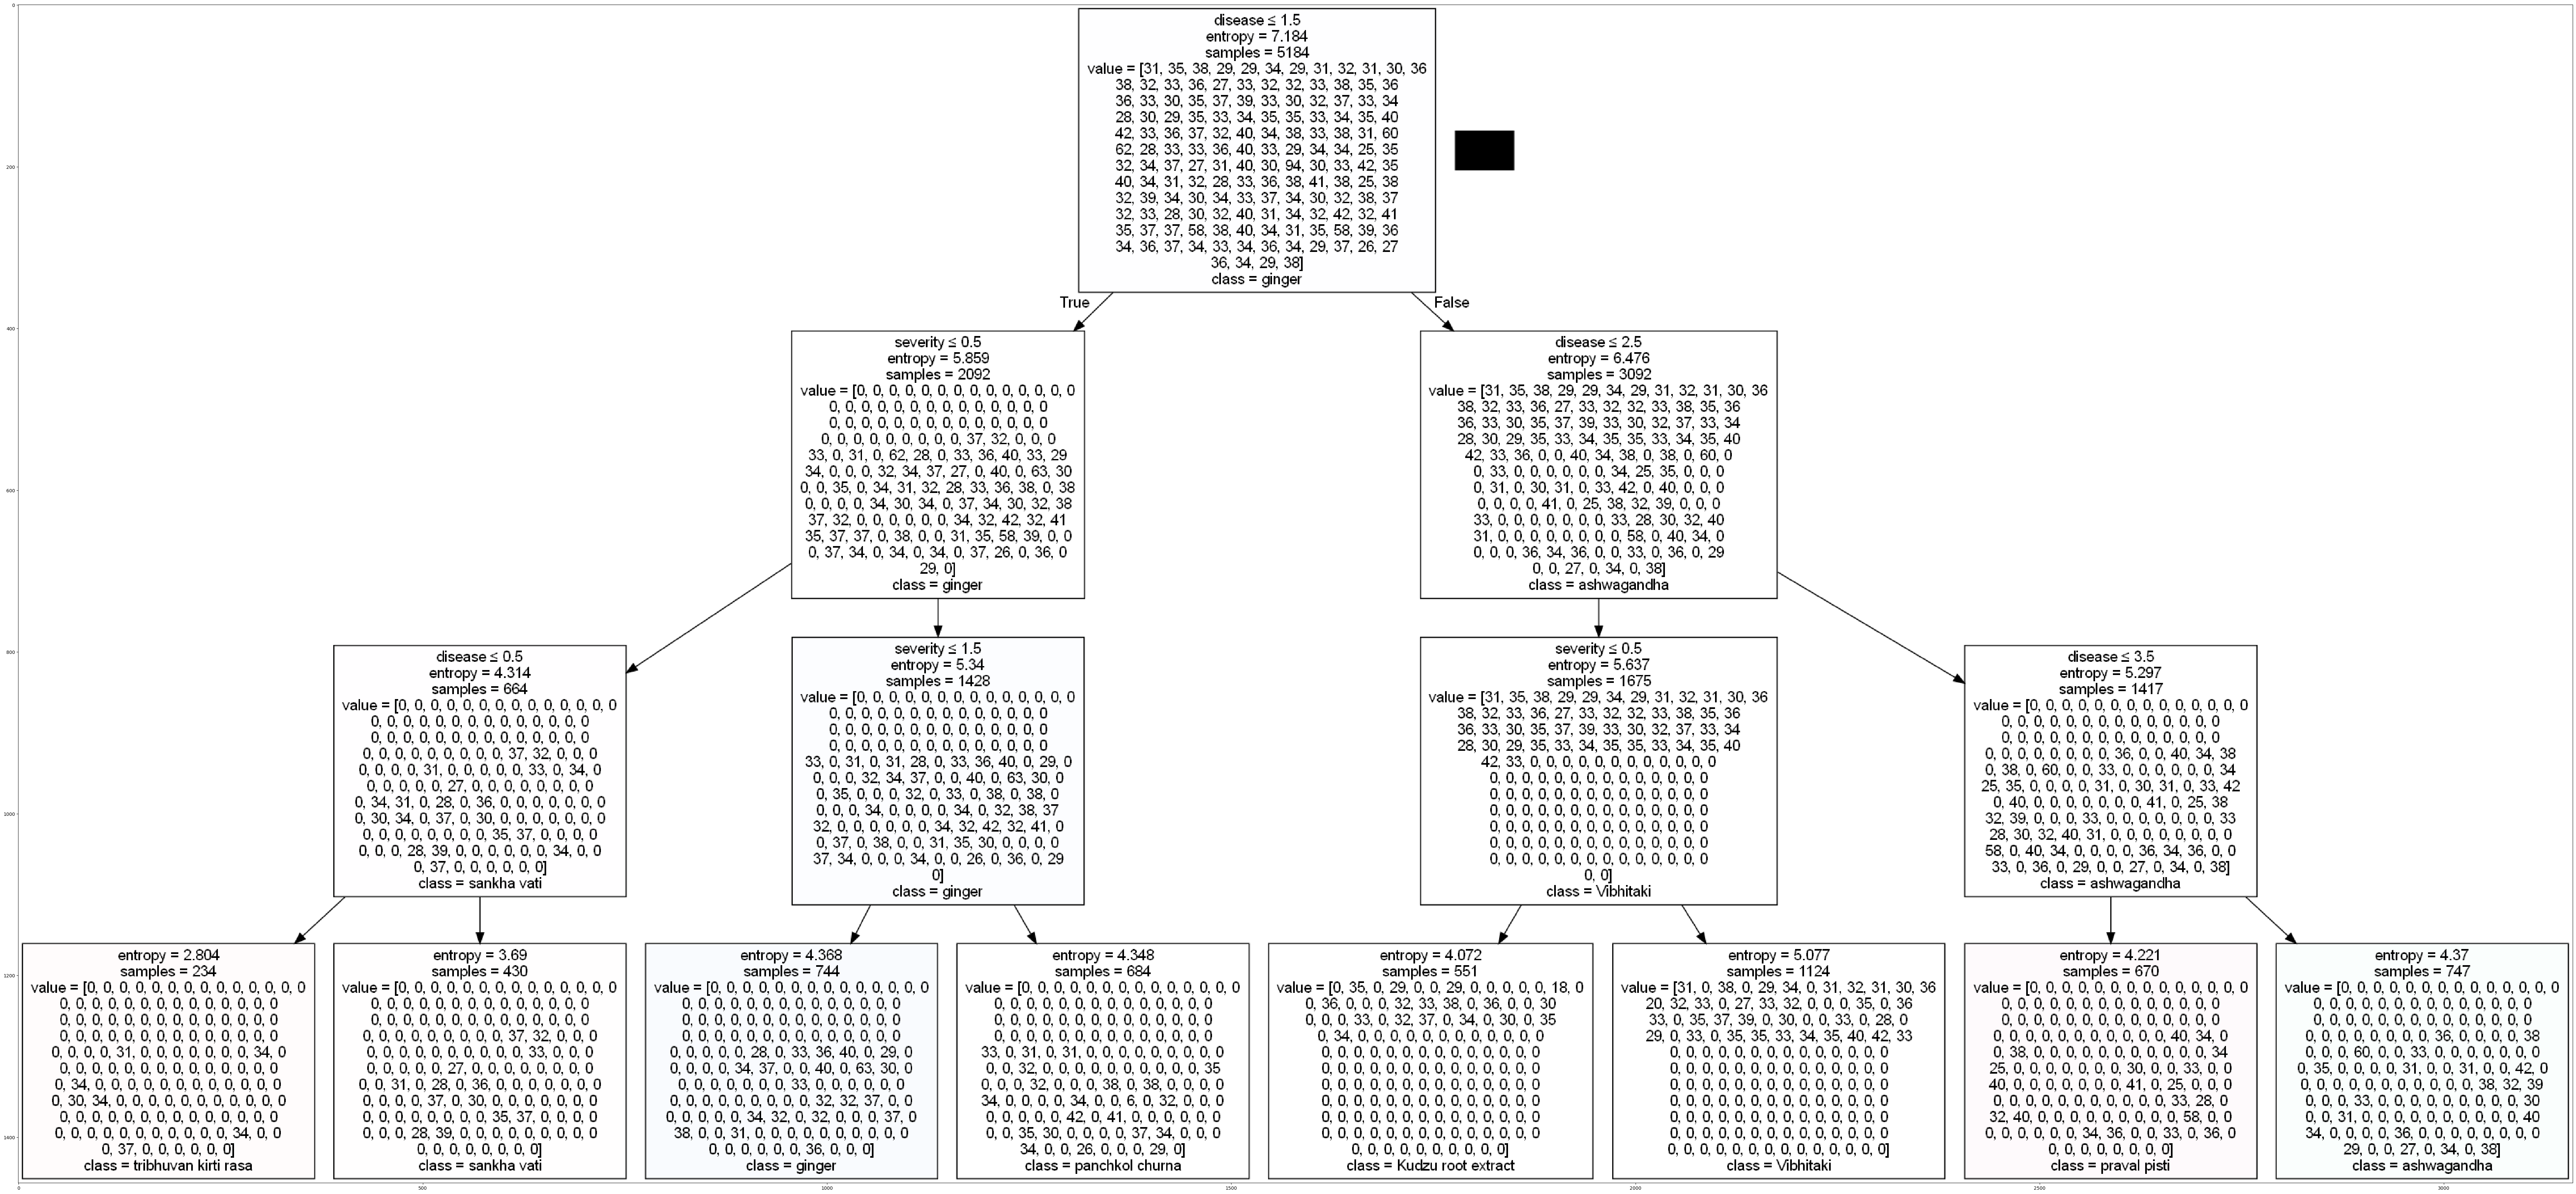

In [155]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:4]
targetNames = my_data["drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Evaluating our test dataset

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
print(classification_report(y_testset, predTree, zero_division = 1))
# Task 4: Generate the confusion matrix for evaluating the testing corpus
conf_matrix = confusion_matrix(y_testset, predTree)
print("Confusion Matrix:")
print(conf_matrix)

                                       precision    recall  f1-score   support

                            Anu Taila       1.00      0.00      0.00        17
            Anu Taila + Shankhapushpi       1.00      0.00      0.00        13
                          Ashwagandha       1.00      0.00      0.00        10
                            Bhrungraj       1.00      0.00      0.00        19
                               Brahmi       1.00      0.00      0.00        19
                         Brighu mitra       1.00      0.00      0.00        14
                   Chandraprabha vati       1.00      0.00      0.00        19
                          Drakshasava       1.00      0.00      0.00        17
                            Erandmool       1.00      0.00      0.00        16
                            Fenugreek       1.00      0.00      0.00        17
                                 Ghee       1.00      0.00      0.00        18
                               Ginger       1.00   

# Evaluating our Training dataset

In [158]:
print(classification_report(y_trainset,predictions_train, zero_division = 1))
# Generate the confusion matrix for evaluating the training corpus
from sklearn.metrics import confusion_matrix

predictions_train = drugTree.predict(X_trainset)
confusion_matrix_train = confusion_matrix(y_trainset, predictions_train)
print("Confusion matrix (training):\n", confusion_matrix_train)

                                       precision    recall  f1-score   support

                            Anu Taila       1.00      0.00      0.00        31
            Anu Taila + Shankhapushpi       1.00      0.00      0.00        35
                          Ashwagandha       1.00      0.00      0.00        38
                            Bhrungraj       1.00      0.00      0.00        29
                               Brahmi       1.00      0.00      0.00        29
                         Brighu mitra       1.00      0.00      0.00        34
                   Chandraprabha vati       1.00      0.00      0.00        29
                          Drakshasava       1.00      0.00      0.00        31
                            Erandmool       1.00      0.00      0.00        32
                            Fenugreek       1.00      0.00      0.00        31
                                 Ghee       1.00      0.00      0.00        30
                               Ginger       1.00   

### Visualizing Confusion Matrix

In [159]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
conf_matrix = confusion_matrix(y_testset, predTree )
print(conf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Train score 0.07310956790123457
Test score 0.06702654071075123


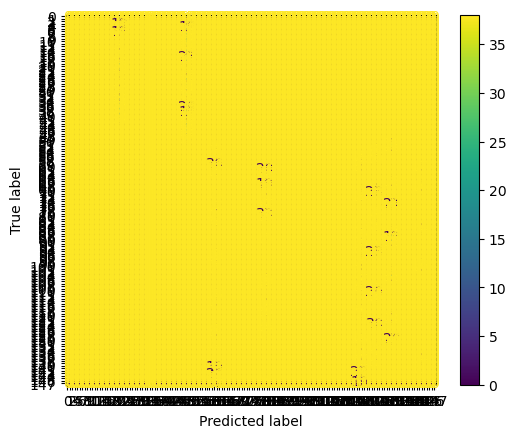

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(train,y_trainset)}')
print(f'Test score {accuracy_score(predTree,y_testset)}')
conf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_train = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_train)
conf_test.plot()
conf_train.plot()